In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**GETTING THE DATA**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MCI_2014_to_2019.csv',sep=',')
df['Total'] = 1
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    206435 non-null  float64
 1   Y                    206435 non-null  float64
 2   Index_               206435 non-null  int64  
 3   event_unique_id      206435 non-null  object 
 4   occurrencedate       206435 non-null  object 
 5   reporteddate         206435 non-null  object 
 6   premisetype          206435 non-null  object 
 7   ucr_code             206435 non-null  int64  
 8   ucr_ext              206435 non-null  int64  
 9   offence              206435 non-null  object 
 10  reportedyear         206435 non-null  int64  
 11  reportedmonth        206435 non-null  object 
 12  reportedday          206435 non-null  int64  
 13  reporteddayofyear    206435 non-null  int64  
 14  reporteddayofweek    206435 non-null  object 
 15  reportedhour     

In [ ]:
print(df.isnull().sum())

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
Total                   0
dtype: int64


**DATA VISUALISATION**

**LINE GRAPH FOR TOTAL CRIMINAL CASES FROM 2014-019**

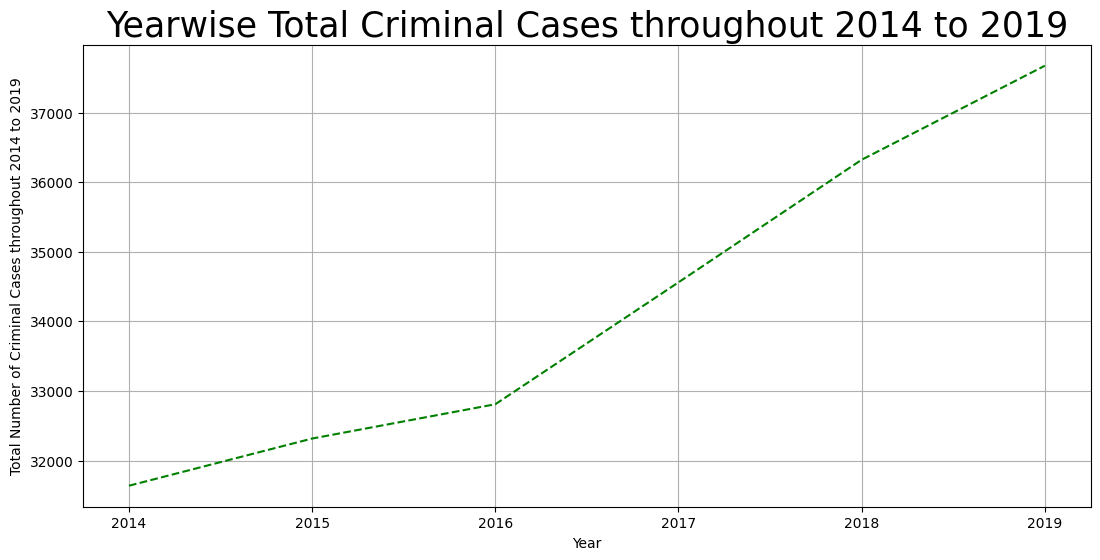

In [ ]:
df2 = df[df['occurrenceyear'] > 2013]
yearwise_total_crime = df2.groupby('occurrenceyear').size()

plt.figure(figsize=(13, 6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line(color='green', linestyle='--')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2014 to 2019')
ax.set_title('Yearwise Total Criminal Cases throughout 2014 to 2019', color='black', fontsize=25)
ax.grid(linestyle='-')
plt.show()


In [ ]:
# Distribution of categorical variables
cat_vars = ['premisetype', 'offence', 'reportedmonth', 'reporteddayofweek', 'MCI', 'Division', 'Neighbourhood']
for var in cat_vars:
    print(df[var].value_counts())

premisetype
Outside       54253
Apartment     49996
Commercial    41081
House         37927
Other         23178
Name: count, dtype: int64
offence
Assault                           76124
B&E                               36305
Theft Of Motor Vehicle            23380
Assault With Weapon               18168
Robbery - Mugging                  6847
B&E W'Intent                       5630
Assault Bodily Harm                5104
Theft Over                         3906
Assault Peace Officer              3581
Robbery With Weapon                3578
Robbery - Other                    3533
Robbery - Business                 2434
Assault - Resist/ Prevent Seiz     2376
Robbery - Swarming                 1947
Aggravated Assault                 1864
Theft From Motor Vehicle Over      1590
Discharge Firearm With Intent      1369
Unlawfully In Dwelling-House       1272
Discharge Firearm - Recklessly      896
Robbery - Purse Snatch              835
Robbery - Home Invasion             830
Pointing A Fir

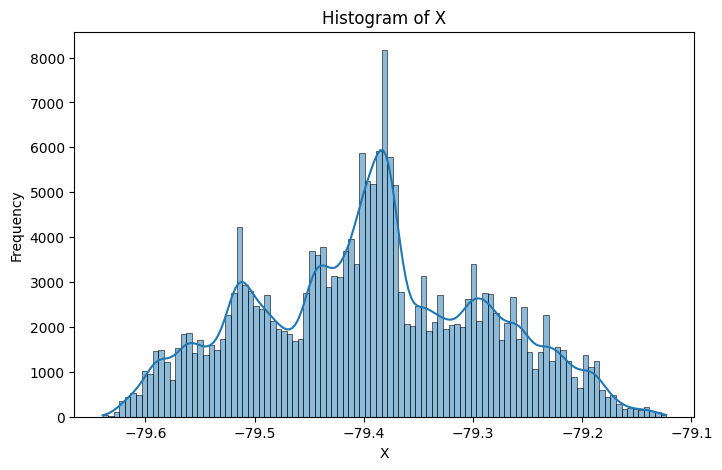

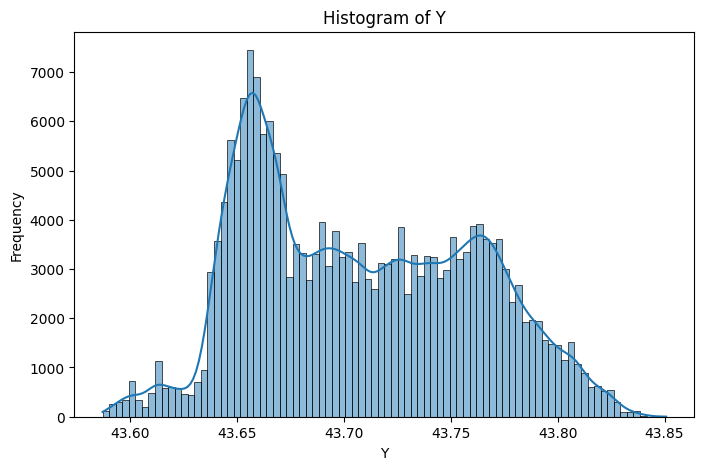

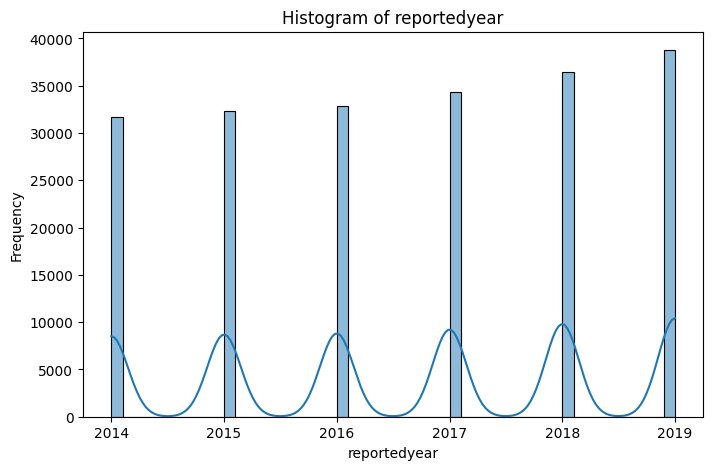

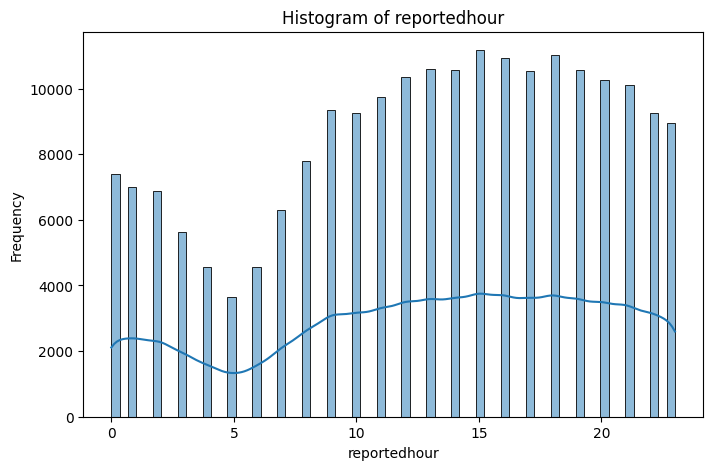

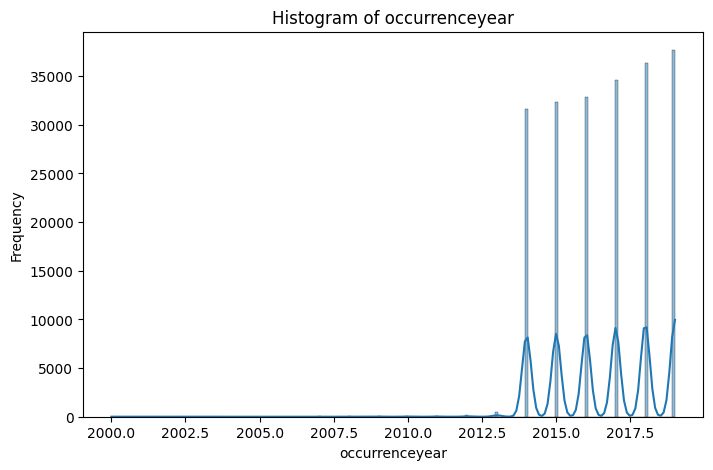

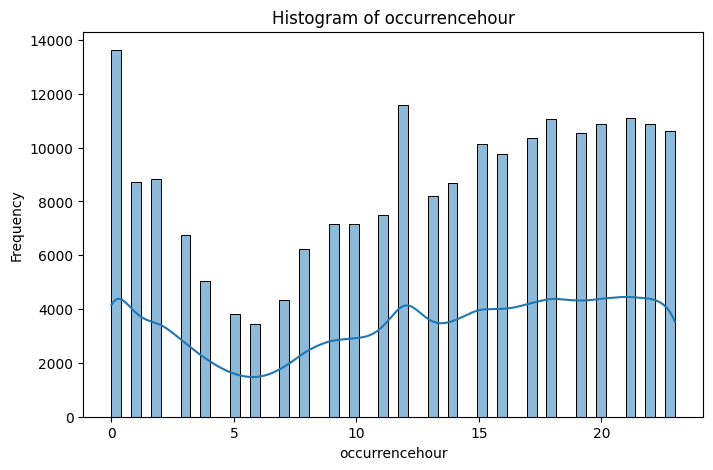

In [ ]:
# Histogram of numerical variables
num_vars = ['X', 'Y', 'reportedyear', 'reportedhour', 'occurrenceyear', 'occurrencehour']
for var in num_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

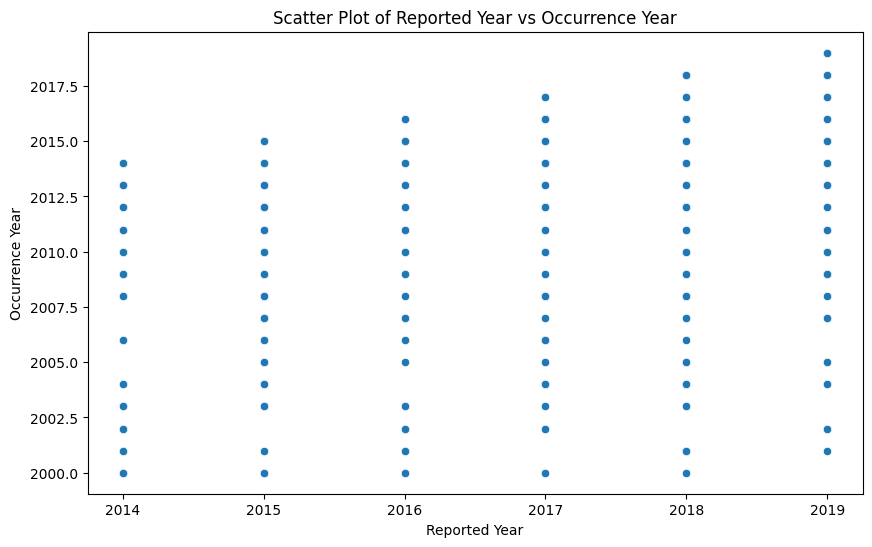

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reportedyear', y='occurrenceyear', data=df)
plt.title('Scatter Plot of Reported Year vs Occurrence Year')
plt.xlabel('Reported Year')
plt.ylabel('Occurrence Year')
plt.show()

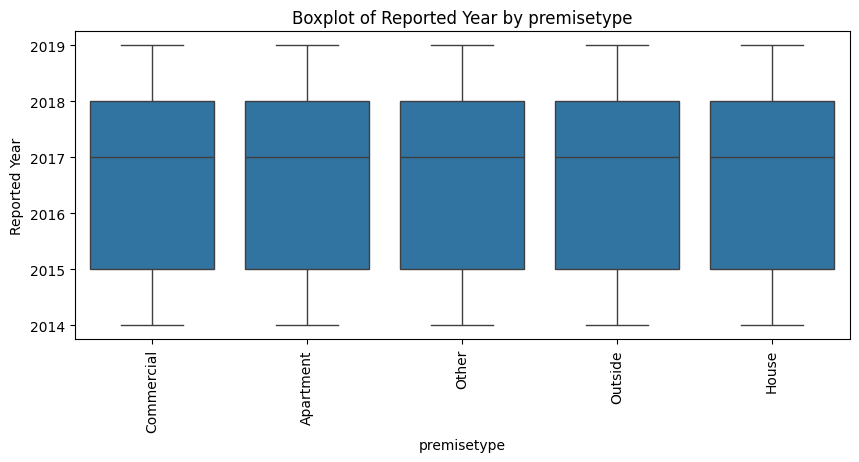

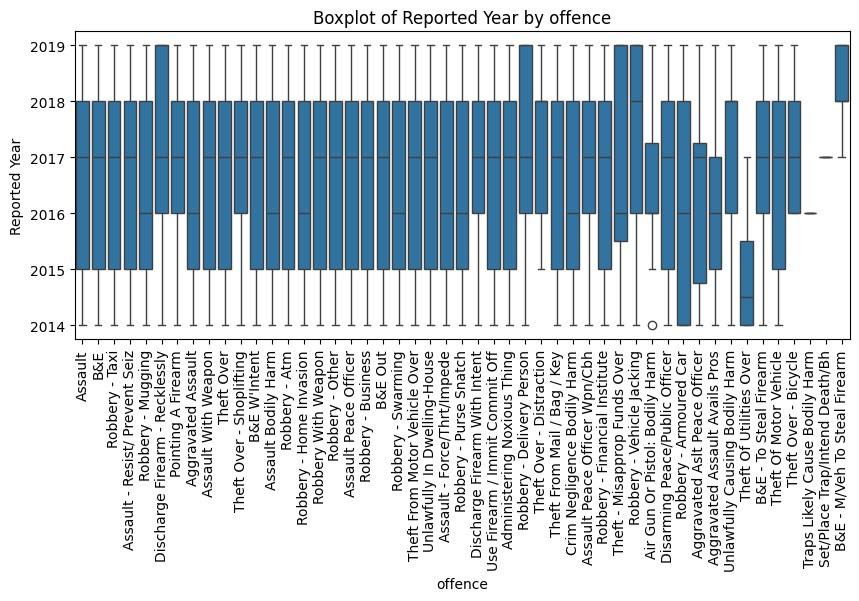

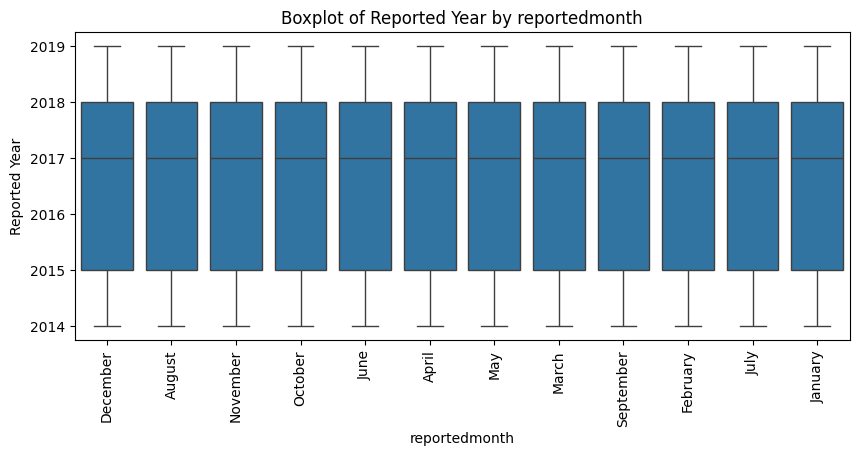

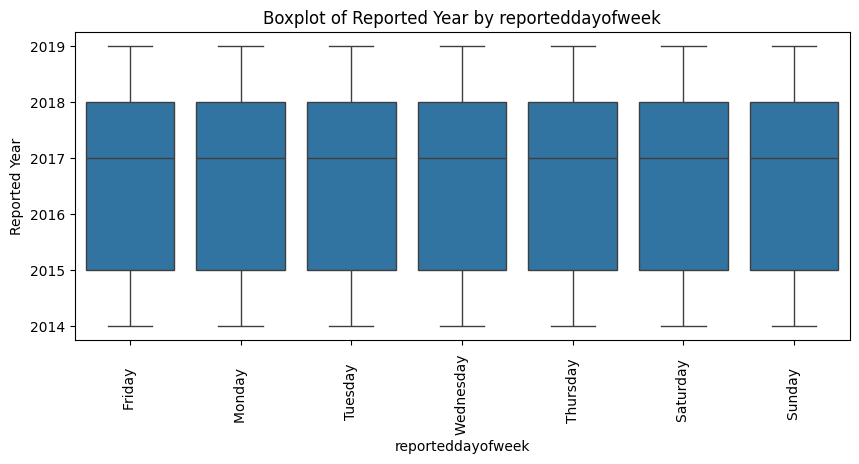

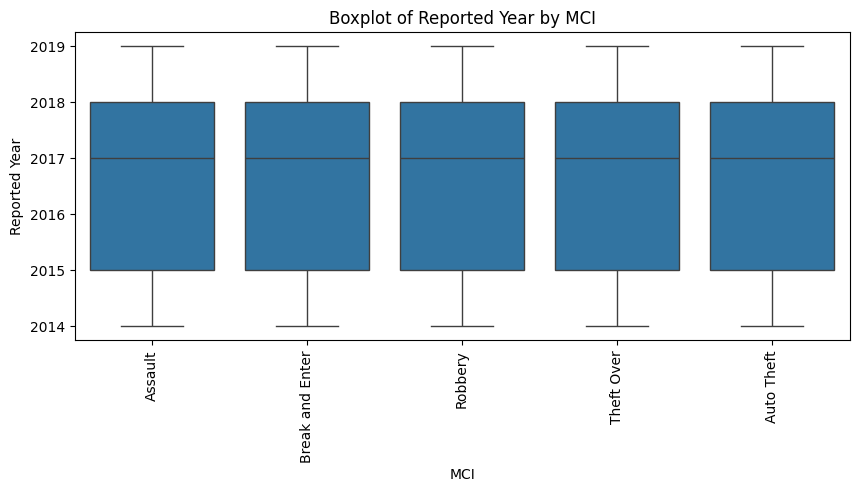

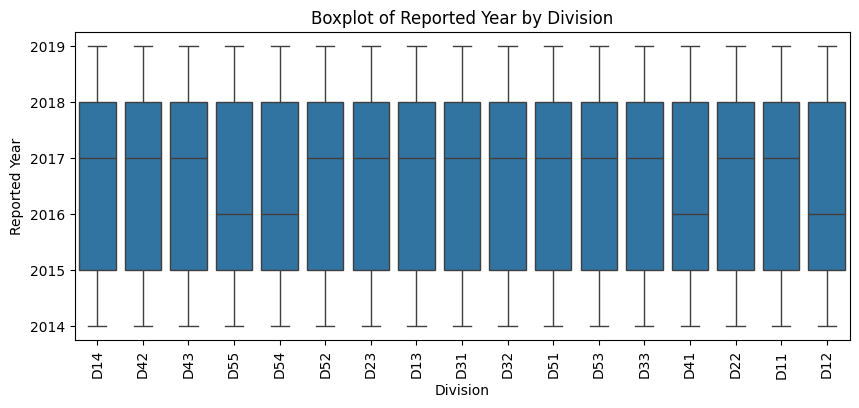

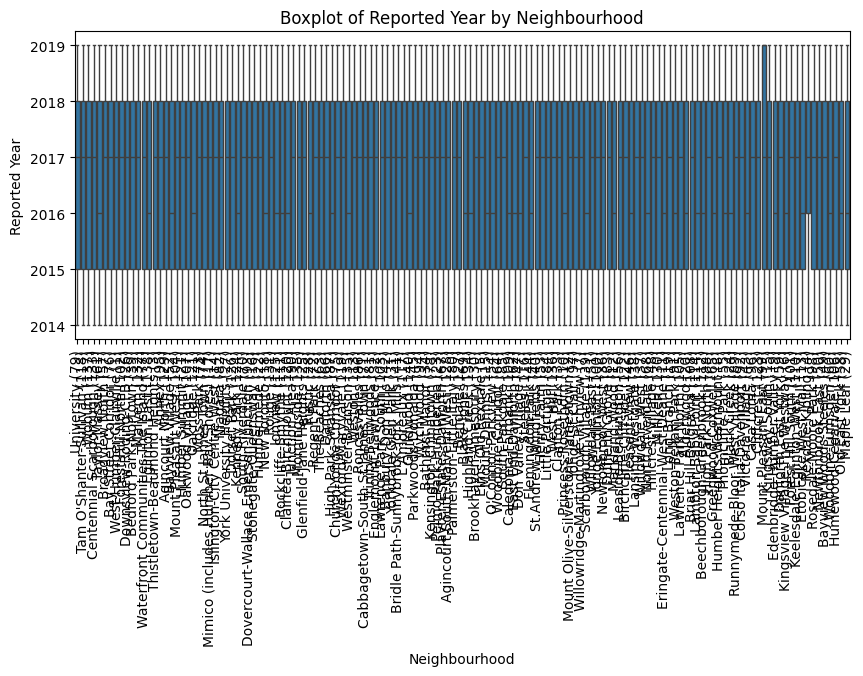

In [ ]:
# Bivariate analysis: Boxplots for categorical variables
for var in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=var, y='reportedyear', data=df)
    plt.title(f'Boxplot of Reported Year by {var}')
    plt.xlabel(var)
    plt.ylabel('Reported Year')
    plt.xticks(rotation=90)
    plt.show()

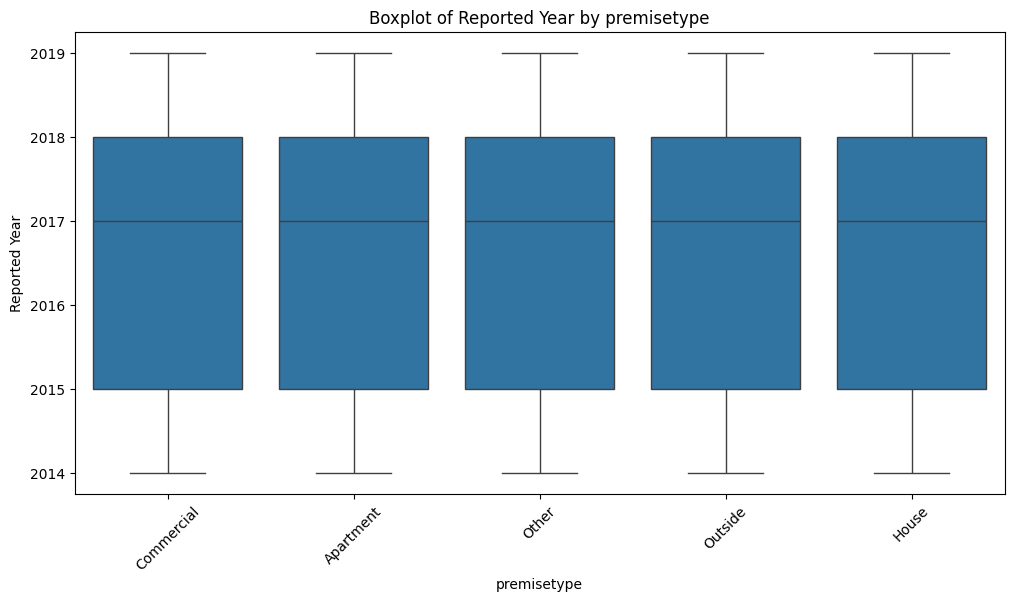

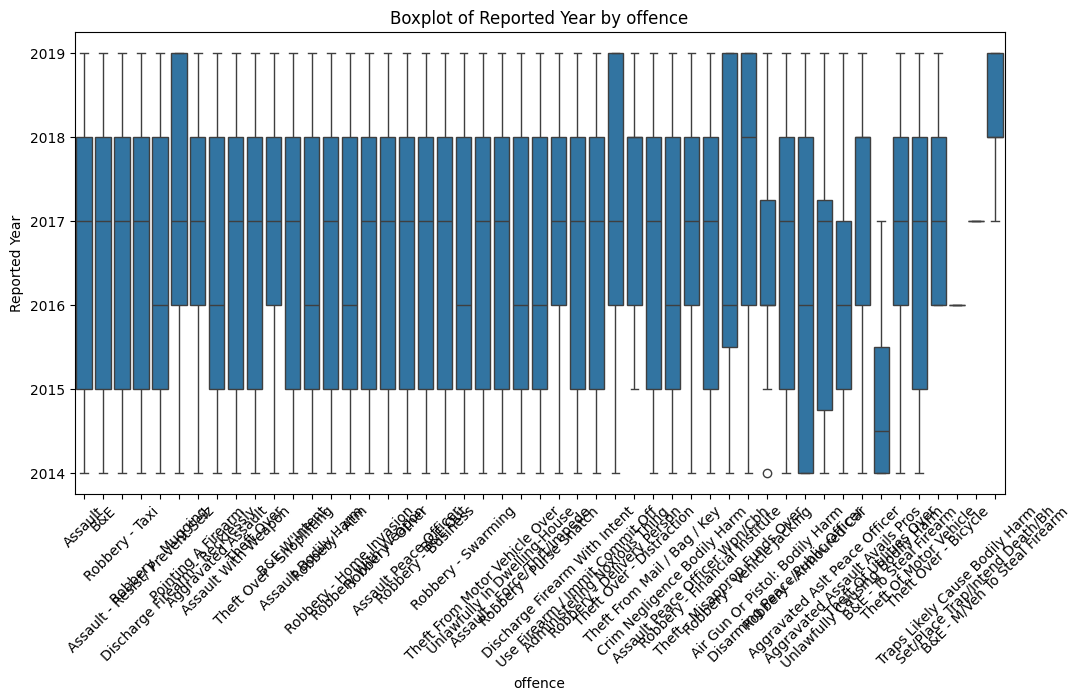

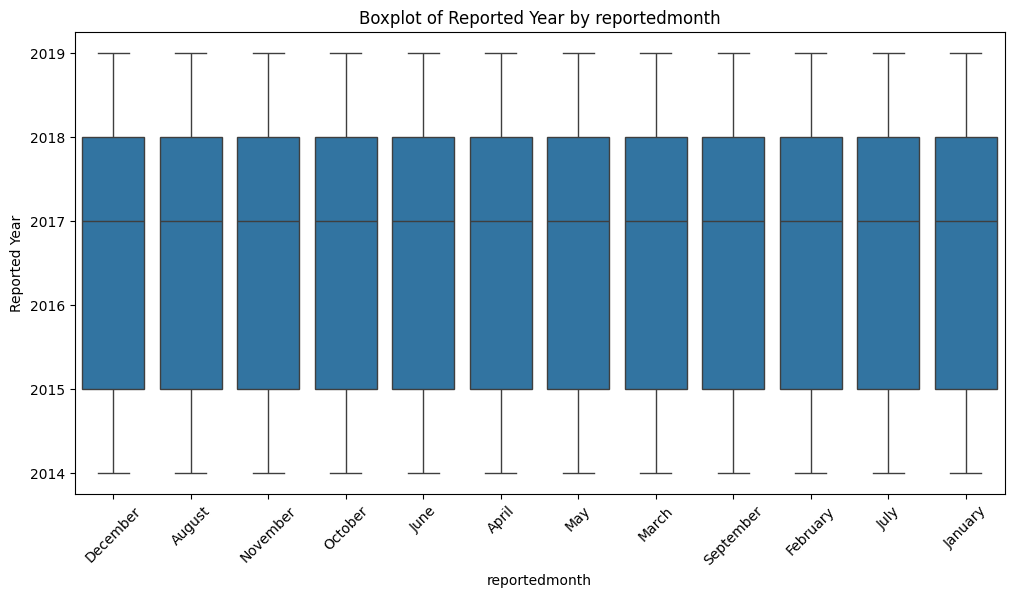

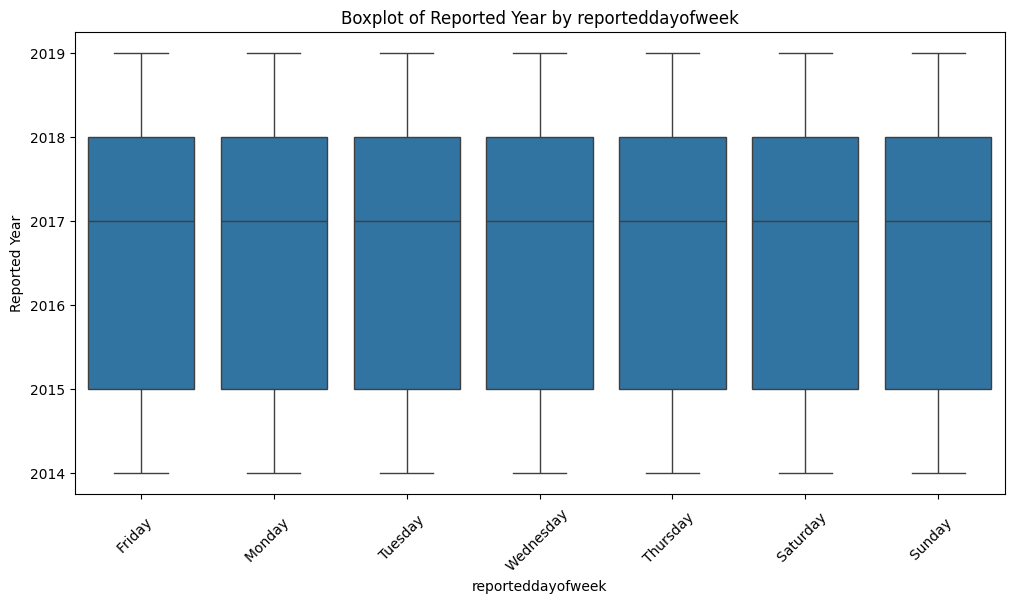

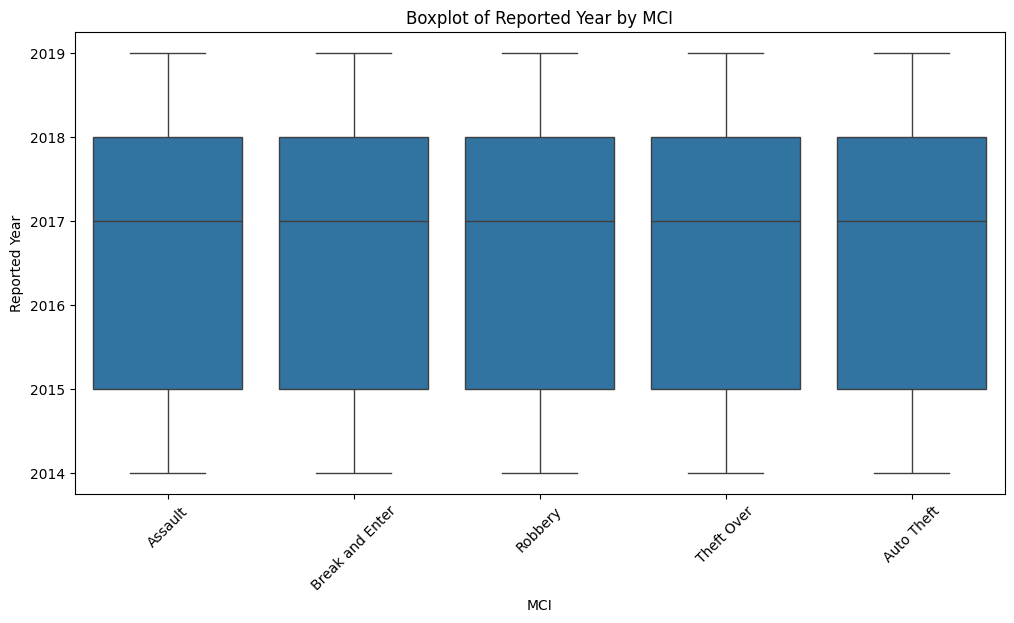

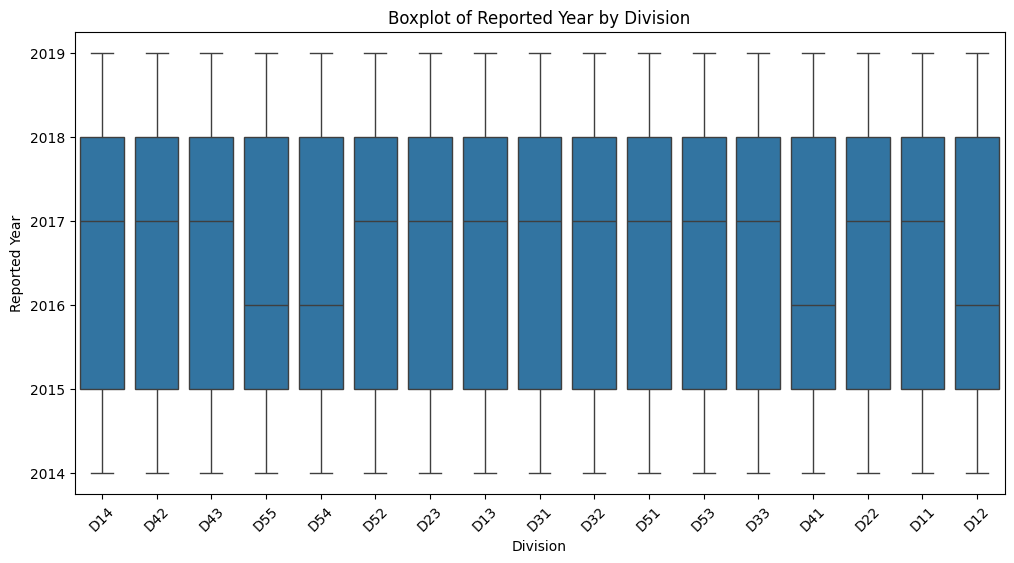

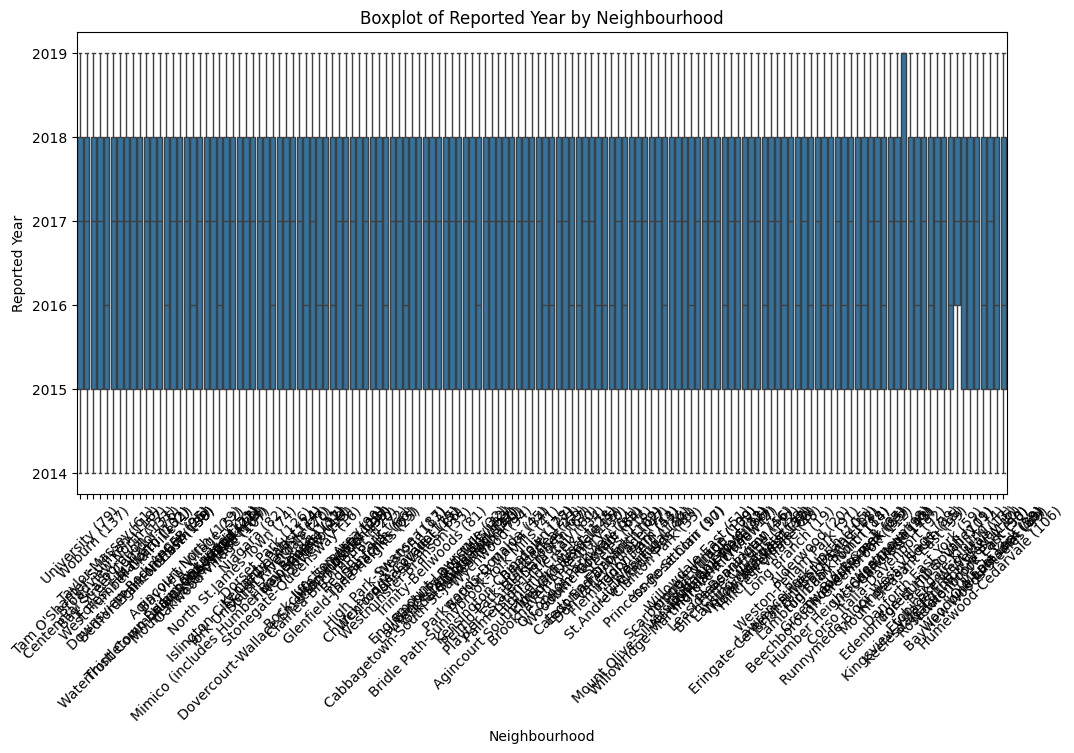

In [ ]:
# Define categorical variables
cat_vars = ['premisetype', 'offence', 'reportedmonth', 'reporteddayofweek', 'MCI', 'Division', 'Neighbourhood']

# Multivariate analysis: Boxplot for numerical variables grouped by categorical variable
for var in cat_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='reportedyear', data=df)
    plt.title(f'Boxplot of Reported Year by {var}')
    plt.xlabel(var)
    plt.ylabel('Reported Year')
    plt.xticks(rotation=45)
    plt.show()



**BARGRAPH OF MAJOR CRIMES**

               MCI   count
0          Assault  111423
1       Auto Theft   23380
2  Break and Enter   43302
3          Robbery   21543
4       Theft Over    6787


<Figure size 1200x600 with 0 Axes>

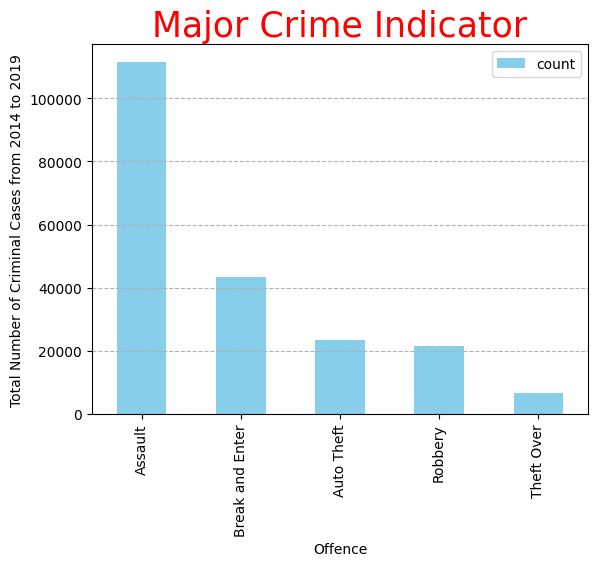

In [ ]:
major_crime_indicator = df.groupby('MCI').size().reset_index(name='count')
print(major_crime_indicator)

plt.figure(figsize=(12, 6))
ct = major_crime_indicator.sort_values(by='count', ascending=False)
ax = ct.plot.bar(x='MCI', y='count', color='skyblue')
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Major Crime Indicator', color='red', fontsize=25)
ax.grid(axis='y', linestyle='--')
plt.show()


**BARGRAPH FOR BREAKING IN CRIMES**

                        offence  count
0                           B&E  36305
1  B&E - M/Veh To Steal Firearm      8
2        B&E - To Steal Firearm      9
3                       B&E Out     78
4                  B&E W'Intent   5630
5  Unlawfully In Dwelling-House   1272


<Figure size 1500x600 with 0 Axes>

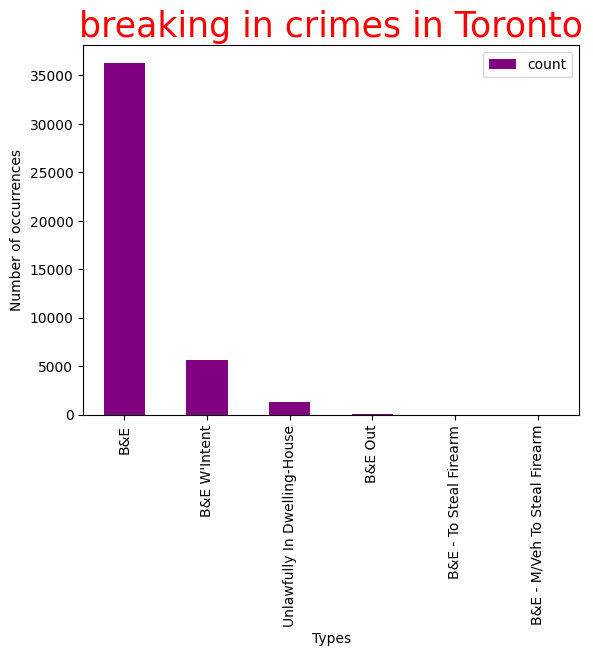

In [ ]:
assault = df[df['MCI'] == 'Break and Enter']
assault_types = assault.groupby('offence').size().reset_index(name='count')
print(assault_types)

plt.figure(figsize=(15, 6))
ct = assault_types.sort_values(by='count', ascending=False)
ax = ct.plot.bar(x='offence', y='count', color='purple')
ax.set_xlabel('Types')
ax.set_ylabel('Number of occurrences')
ax.set_title('breaking in crimes in Toronto', color='red', fontsize=25)
plt.show()


**BARGRAPH FOR ASSUALT CRIMES**

                           offence  count
0      Administering Noxious Thing    296
1    Aggravated Aslt Peace Officer     12
2               Aggravated Assault   1864
3   Aggravated Assault Avails Pros     13
4   Air Gun Or Pistol: Bodily Harm     20
5                          Assault  76124
6      Assault - Force/Thrt/Impede    257
7   Assault - Resist/ Prevent Seiz   2376
8              Assault Bodily Harm   5104
9            Assault Peace Officer   3581
10   Assault Peace Officer Wpn/Cbh    319
11             Assault With Weapon  18168
12     Crim Negligence Bodily Harm     82
13  Disarming Peace/Public Officer     72
14  Discharge Firearm - Recklessly    896
15   Discharge Firearm With Intent   1369
16              Pointing A Firearm    737
17  Set/Place Trap/Intend Death/Bh      1
18  Traps Likely Cause Bodily Harm      1
19  Unlawfully Causing Bodily Harm     13
20  Use Firearm / Immit Commit Off    118


<Figure size 1500x600 with 0 Axes>

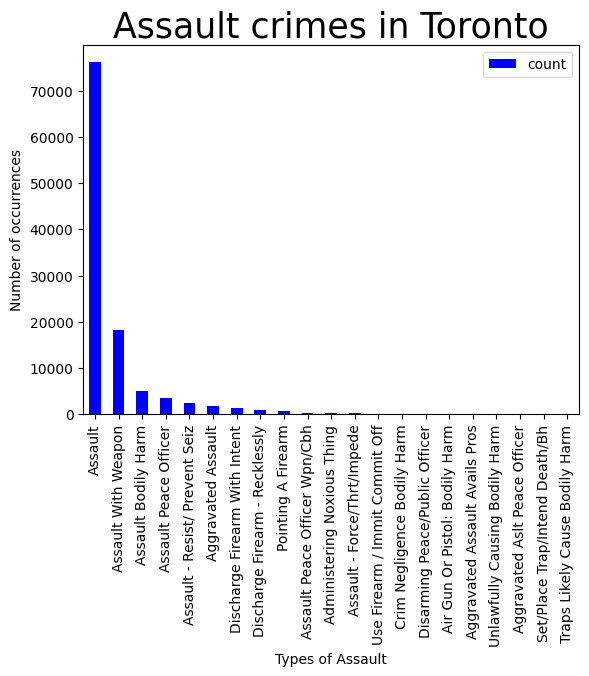

In [ ]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence').size().reset_index(name='count')
print(assault_types)

plt.figure(figsize=(15, 6))
ct = assault_types.sort_values(by='count', ascending=False)
ax = ct.plot.bar(x='offence', y='count', color='blue')
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurrences')
ax.set_title('Assault crimes in Toronto', color='black', fontsize=25)
plt.show()


**LINEGRAPH FOR CRIMETYPE BY HOUR OF DAY**

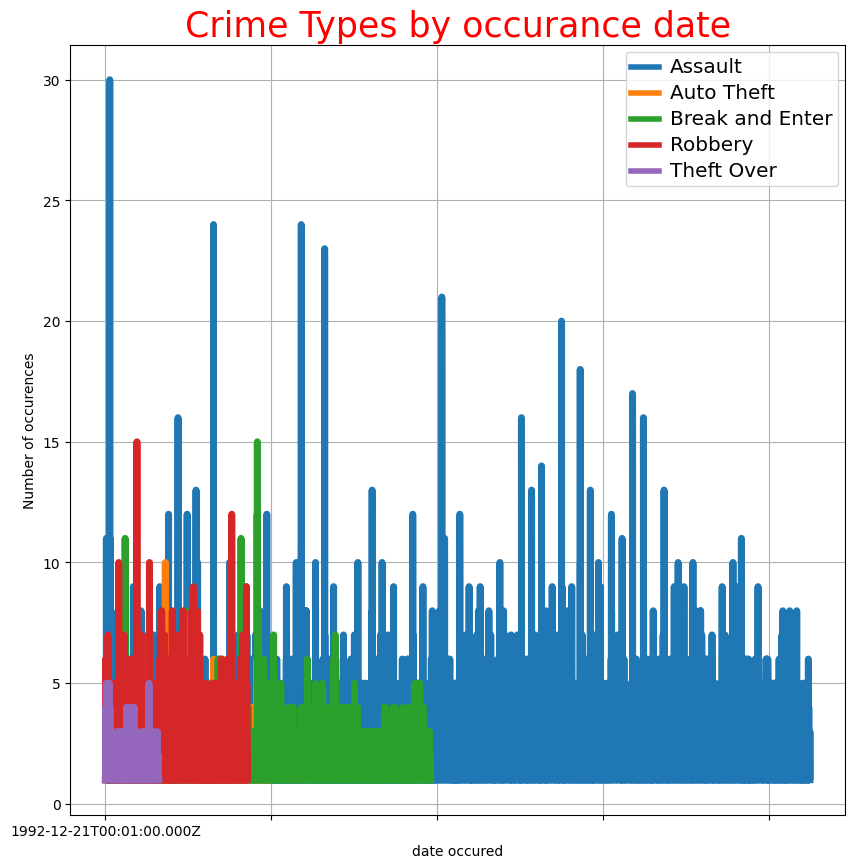

In [ ]:
hour_crime_group = df.groupby(['occurrencedate','MCI'],as_index=False).agg({'Total':'sum'})

fig, ax = plt.subplots(figsize=(10,10))
hour_crime_group.groupby('MCI').plot(x="occurrencedate", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('date occured')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by occurance date',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hour_crime_group.groupby('MCI')['MCI']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

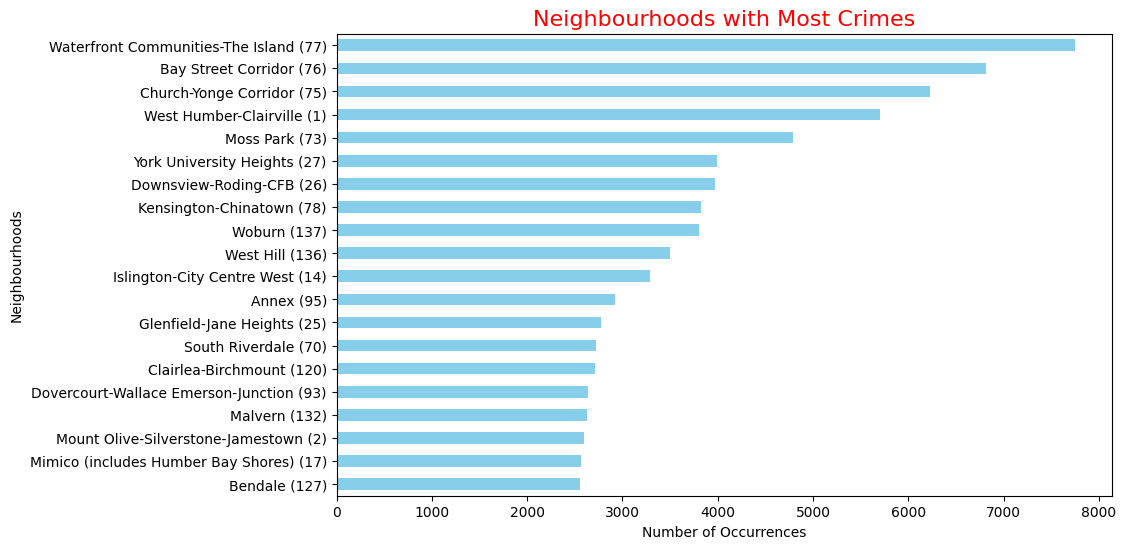

In [ ]:
location_group = df['Neighbourhood'].value_counts().head(20)

plt.figure(figsize=(10, 6))
location_group.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Neighbourhoods')
plt.title('Neighbourhoods with Most Crimes', fontsize=16, color='red')

plt.gca().invert_yaxis()
plt.show()

**Heatmap for Major Crime indicator by Month**

<ipython-input-11-1405161e0af4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_count = mci_monthwise.pivot("MCI", "occurrencemonth", "Total")


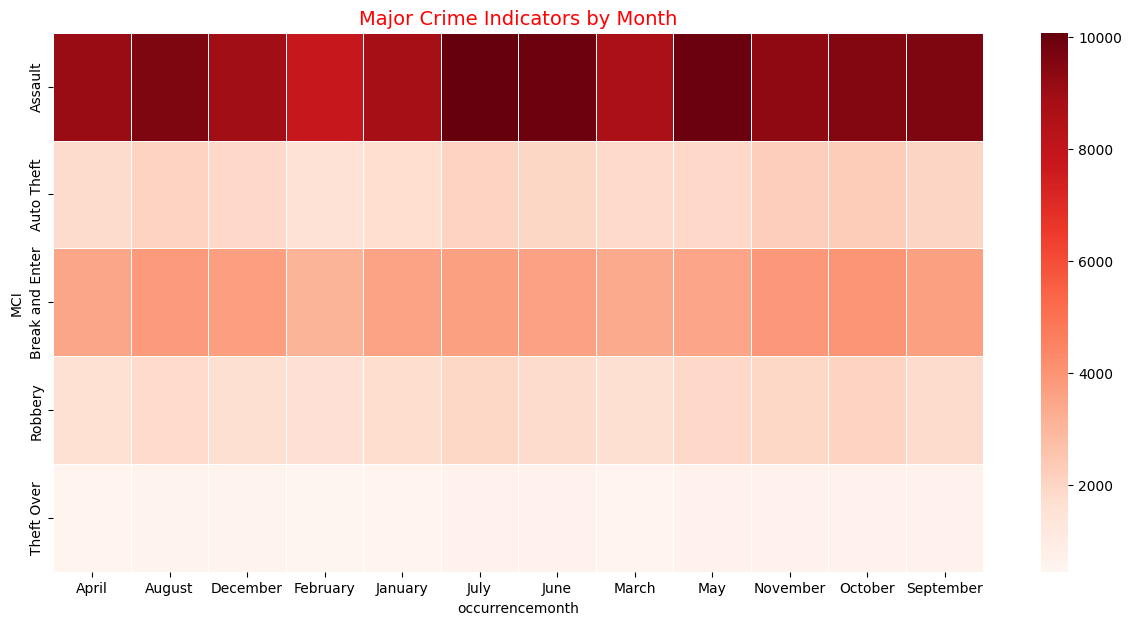

In [ ]:
mci_monthwise = df.groupby(['occurrencemonth', 'MCI'], as_index=False).agg({'Total': 'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot("MCI", "occurrencemonth", "Total")

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count, cmap="Reds", linewidths=0.5)
plt.title("Major Crime Indicators by Month", color='red', fontsize=14)
plt.show()


**PIECHART FOR CRIME BY PRIMSETYPE**

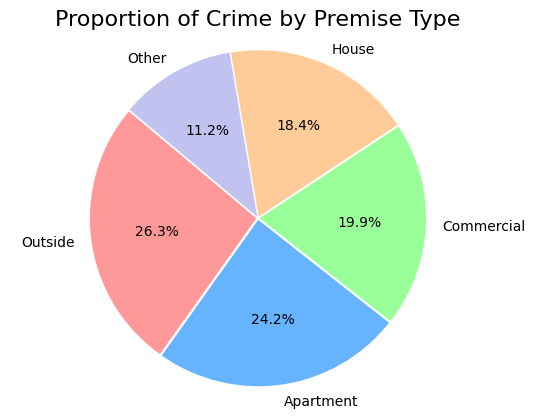

In [ ]:
labels = ['Outside', 'Apartment', 'Commercial', 'House', 'Other']
count = [54253, 49996, 41081, 37927, 23178]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

explode = (0.01, 0.01, 0.01, 0.01, 0.01)
fig, ax = plt.subplots()
ax.pie(count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

ax.axis('equal')
plt.title("Proportion of Crime by Premise Type", fontsize=16)

plt.show()


**PREPROCESSING THE DATA**

In [ ]:
# Columns for the models
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

# New dataframe from columns
df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

**SPLITTING THE DATASET INTO TRAINING SET AND TESTS SET**

USING CLASSIFICATION

In [ ]:
#set X and Y:
X = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#One Hot Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

NameError: ignored

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest numeric encoded : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest with Balanced class weight: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300,
                                 criterion='entropy', max_depth=4,
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6,
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

In [ ]:
pip install pydotplus


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

dot_data = StringIO()
export_graphviz(treeclf,
                out_file=dot_data,

                class_names=['Assault', 'Break and Enter',
                             'Robbery', 'Auto Theft', 'Theft Over'],
                filled=True,
                rounded=True,
                leaves_parallel=False,
                rotate=False,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Create and train a Decision Tree classifier
treeclf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
treeclf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = treeclf.predict(X_test)

# Convert y_test and y_pred to lists
y_test = y_test.tolist()
y_pred = y_pred.tolist()

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create and train a Decision Tree classifier
treeclf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
treeclf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = treeclf.predict(X_test)

# Convert y_test and y_pred to lists
y_test = y_test.tolist()
y_pred = y_pred.tolist()

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Increase the number of iterations
logreg = LogisticRegression(max_iter=1000, class_weight=None)

# Fit the model
logreg.fit(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight=None)
logreg.fit(X_train, y_train)


In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)


In [ ]:
y_pred = knn.predict(X_test)